In [1]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 
import warnings
from copy import deepcopy
from __future__ import print_function
warnings.filterwarnings("ignore")
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


In [2]:
#first lets look at a SPOL file from AIME given they had a hill there
#0.6960° S, 73.1556° E

In [3]:
spol_radar = pyart.io.read('/data/radar/ENA/cfrad.20111026_124532.063_to_20111026_125028.172_SPOL_v839_SUR.nc')

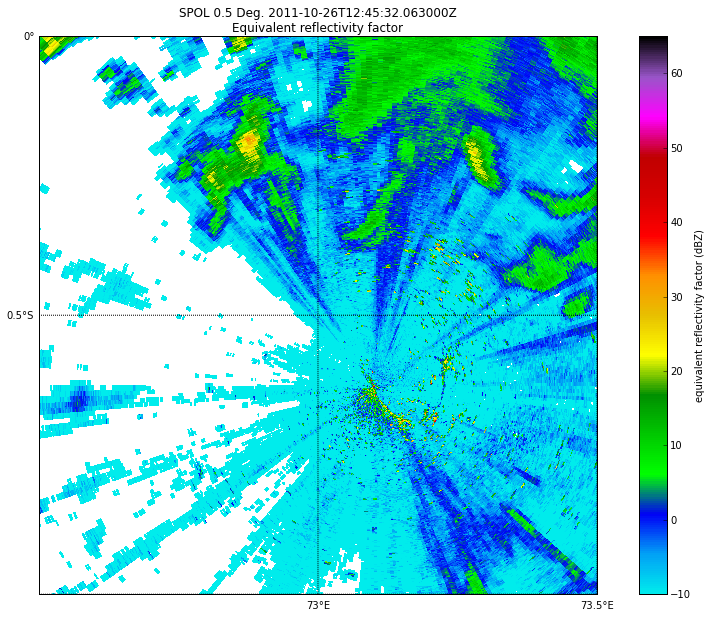

In [4]:
my_figure = plt.figure(figsize=[15,10])
my_display = pyart.graph.RadarMapDisplay(spol_radar)
lat_lines = np.arange(-4,4,.5)
lon_lines = np.arange(70, 76, .5)
my_display.plot_ppi_map('DBZ_S', 0, 
                        lat_lines=lat_lines,
                       lon_lines=lon_lines,
                       max_lon = 73.5, max_lat = 0.,
                       min_lon = 72.5, min_lat = -1)


In [5]:
print(spol_radar.fields.keys())

[u'DBZ_NAA_S', u'RATE_HYBRID', u'RHOHV_NNC_S', u'TEMP_FOR_PID', u'SNRVX_K', u'DBZ_NAA_K', u'DBMVX_S', u'DBZ_K', u'RHOHV_S', u'RATE_KDP', u'PID', u'SNRHC_S', u'RATE_Z_ZDR', u'KDP_S', u'SNRHC_K', u'DBMVC_S', u'PSOB_S', u'DBZ_S', u'WIDTH_S', u'SNRVX_S', u'CMD_FLAG_S', u'LDRH_K', u'CMD_S', u'PHIDP_S', u'DBMHC_K', u'LDRV_S', u'VEL_ALT_S', u'NCP_S', u'RATE_KDP_ZDR', u'SNRHX_S', u'CPA_S', u'VEL_HV_S', u'LDRH_S', u'DBMHC_S', u'DBMHX_S', u'CLUT_S', u'ZDR_S', u'RATE_ZH', u'VEL_S', u'SNRVC_S', u'DBMVX_K']


In [6]:
in_dir = '/data/radar/ENA/'
all_spols = os.listdir(in_dir)
all_spols.sort()

In [7]:
all_radars = [pyart.io.read(in_dir + fn).fields['DBZ_S']['data'] for fn in all_spols]

In [8]:
z_stack = np.stack(all_radars)
z_stack_masked = np.ma.masked_where(z_stack < -160, z_stack )
new_z = np.ma.mean(z_stack_masked, axis = 0)
print(new_z.shape)

(2880, 979)


In [9]:
out_radar = deepcopy(spol_radar)
first_z = out_radar.fields['DBZ_S']
for item in out_radar.fields.keys():
    del out_radar.fields[item]



In [10]:
first_z['data'] = new_z

In [11]:
#del all_radars

out_radar.add_field('mean_z', first_z)

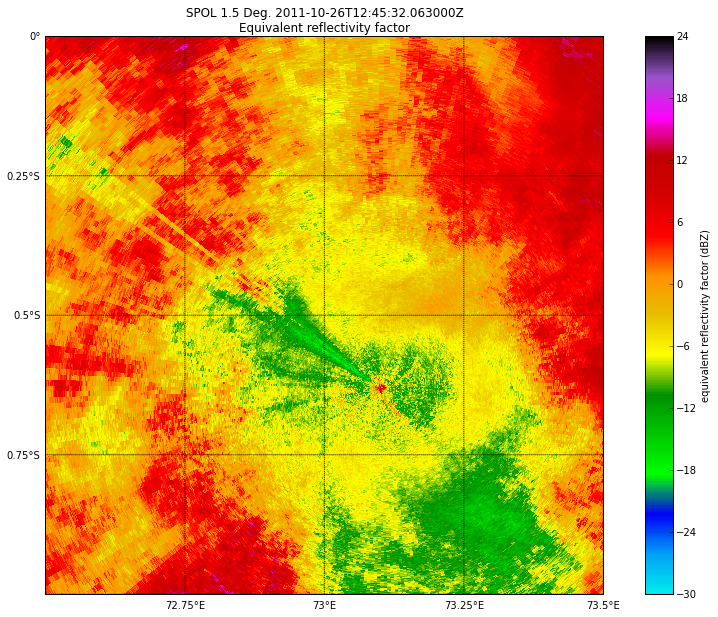

In [17]:
my_figure = plt.figure(figsize=[15,10])
my_display = pyart.graph.RadarMapDisplay(out_radar)
lat_lines = np.arange(-4,4,.25)
lon_lines = np.arange(70, 76, .25)
my_display.plot_ppi_map('mean_z', 1, 
                        lat_lines=lat_lines,
                       lon_lines=lon_lines,
                       max_lon = 73.5, max_lat = 0.,
                       min_lon = 72.5, min_lat = -1, 
                        cmap = pyart.graph.cm.NWSRef, 
                        mask_outside = False,
                       vmin=-30, vmax=24)
